## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv("ab_data.csv")
df.head()


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:

df.shape[0] ## can also use df.tail

294478

c. The number of unique users in the dataset.

In [4]:
total_uniq = len(df.user_id.unique())
print(total_uniq)

290584


d. The proportion of users converted.

In [5]:
con = df.groupby('converted').size()
print(con)
con_0 = con[0]
con_1 = con[1]
prop = con_1/total_uniq
print(prop)

converted
0    259241
1     35237
dtype: int64
0.121262698566


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
t = df.groupby(['landing_page','group']).size()
new_con = t[0]
new_trt = t[1]
old_trt = t[3]
old_con = t[2]
print(t)
print(new_con)
print(old_trt)
total_na = new_con + old_trt
print(total_na)

landing_page  group    
new_page      control        1928
              treatment    145311
old_page      control      145274
              treatment      1965
dtype: int64
1928
1965
3893


f. Do any of the rows have missing values?

In [7]:
df.isnull().values.any()

False

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
i = df[((df.group == 'treatment') &( df.landing_page == 'old_page'))].index
df1=df.drop(i)
j = df1[((df1.group == 'control') &( df1.landing_page == 'new_page'))].index
df2 = df1.drop(j)
df2.tail()## use tail() to avoid seeing the entire data frame


,user_id,timestamp,group,landing_page,converted
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df3=df2.groupby(['user_id']).size().reset_index(name='bool')
df3.tail()# using tail , we show last few values or all 290584 values shall be displayed ##
# number of unique user ids is 290584 as the the values start from 0 #

,user_id,bool
290579,945994,1
290580,945996,1
290581,945997,1
290582,945998,1
290583,945999,1


b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df3[df3['bool']==2].groupby(['user_id']).size().reset_index(name='bool')
## only the unique user id's bool is 2 as the rest are unique and correspond to bool 1

,user_id,bool
0,773192,1


c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id']==773192].groupby(['group','landing_page','converted']).size().reset_index(name='info')

,group,landing_page,converted,info
0,treatment,new_page,0,2


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2=df2.drop_duplicates(subset='user_id', keep='first', inplace=False)#removes duplicated user_id {subset} , keep = first keeps the first code 

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df4=df2.groupby(['converted']).size().reset_index(name='info')
print (df4)
prob = 34753/total_uniq
prob

   converted    info
0          0  255831
1          1   34753


0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
df5=df2[df2['group']=='control'].groupby(['converted']).size().reset_index(name='info')
print(df5)
prob_2 = 17489/total_uniq
print (prob_2)
u=df5['info'][1]## gives the converted in control group
print("the probablitity that they converted,being in control group is",u/old_con)

   converted    info
0          0  127785
1          1   17489
0.06018569501417834
the probablitity that they converted,being in control group is 0.1203863045


c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
df6=df2[df2['group']=='treatment'].groupby(['converted']).size().reset_index(name='info')
print(df6)
prob3 = 17489/total_uniq
print (prob3)
v=df6['info'][1]
print("the probablitity that they converted,being in treatment group is",v/new_trt)

   converted    info
0          0  128046
1          1   17264
0.06018569501417834
the probablitity that they converted,being in treatment group is 0.118807247903


d. What is the probability that an individual received the new page?

In [17]:
df7=df2.groupby(['landing_page']).size().reset_index(name = 'index')
print(df7)
w = df7['index'][0]## gives the index when landing page is the new page
x = df7['index'][1]## number of peopple receiving the old page
print("probability that an induvidual gets the new page is" ,w/total_uniq )


  landing_page   index
0     new_page  145310
1     old_page  145274
probability that an induvidual gets the new page is 0.500061944223


e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

From the answets we get from a through d , we can't see sufficient evidence that the new treatment page leads to more conversions as the probablities of an induvidual converting with regard to which group they're from and regardless of which page they receive seem to be about the same

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Under null hypothesis we consider that the old page is page is better than the new page , so P(old) >= P(new)
So , we want to check if this null hypothesis is true or if the alternate hypothesis that the new page is better than the old one holds true ,i.e, P(new) > P(old).


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [18]:
mean1 = []# calculating the p(new) under Null.So an array is to  be created
p_new_samp = df2.sample(df2.shape[0], replace = True)## creation of sample
newpage_df = p_new_samp.query('landing_page == "new_page"')#3 new df consisting of only data with new page  
## query makes index selections very easy
newpage_crt = newpage_df.query('converted == 1').user_id.nunique() / (newpage_df.query('converted == 0').user_id.nunique()+newpage_df.query('converted == 1').user_id.nunique()) 
## converted sample / total sample gives you the convert rate 
mean1.append(newpage_crt)
mean1= np.array(mean1)
mean1.mean()
### run the code till you get approximately the same convert rate for p_new as the old converted rate in ab_data.csv(0.1196 approx) ##

0.11830529486607871

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [19]:
mean2 = []# calculating the p(old) under Null.

oldpage_df = p_new_samp.query('landing_page == "old_page"')#3 new df consisting of only data with old page  

oldpage_crt = oldpage_df.query('converted == 1').user_id.nunique() / (oldpage_df.query('converted == 0').user_id.nunique()+oldpage_df.query('converted == 1').user_id.nunique()) 
## converted sample / total sample gives you the convert rate 
mean2.append(oldpage_crt)
mean2= np.array(mean2)
mean2.mean()

0.12033616751546414

c. What is $n_{new}$?

In [20]:
#number of people receiving new page
print (w)

145310


d. What is $n_{old}$?

In [21]:
#number of people receiving old page
print(x)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice([0,1],size=w,p=[0.8804, 0.1196])
new_page_converted = np.array(new_page_converted)## converts into numpy array

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice([0,1],size = x, p =[0.8804, 0.1196] )
old_page_converted = np.array(old_page_converted)#  converts into numpy array

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
p_new=np.count_nonzero(new_page_converted == 1)/w ##this counts every non zero element satisfying the condition, for new page
p_old = np.count_nonzero(old_page_converted == 1)/x ##this counts every non zero element satisfying the condition , for old page
diff = p_new-p_old
diff## this is p_new - p_old for simulated values

-0.002245642627226721

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [25]:
p_diffs = []
for _ in range(10000):# Simulating diff 10000 times 
    new_page_converted = np.random.choice([0,1],size = w, p =[0.8804, 0.1196] )
    new_page_converted = np.array(new_page_converted)
    old_page_converted = np.random.choice([0,1],size = x, p =[0.8804, 0.1196] )
    old_page_converted = np.array(old_page_converted)
    p_new = np.count_nonzero(new_page_converted == 1)/w
    p_old = np.count_nonzero(old_page_converted == 1)/x
    p_diffs.append(p_new-p_old) ## puts stuff into arrays
p_diffs = np.array(p_diffs)


    

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   16.,   180.,   648.,  1790.,  2806.,  2563.,  1437.,   466.,
           81.,    13.]),
 array([-0.00423508, -0.00335821, -0.00248134, -0.00160447, -0.00072759,
         0.00014928,  0.00102615,  0.00190302,  0.00277989,  0.00365677,
         0.00453364]),
 <a list of 10 Patch objects>)

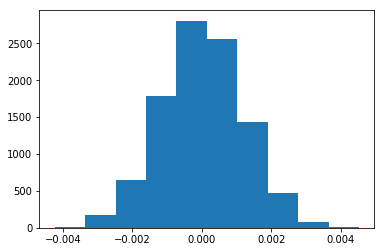

In [26]:

plt.hist(p_diffs)


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
## p_diffs is the array consisting of 10000 simulations of p_new-p_old . The proportion greater than actual
## difference is to be given , let's create a new variable
actual_difference = (v/new_trt) - (u/old_con) 
actual_difference ## this is the difference of probabilities between 
                  ## when the induvidual was in the treatment group and in the control group
##NOW we calculate the proportion
prop =(actual_difference) < p_diffs ## tells us when this condition is satisfied for each variable in the array
print(prop)
prop.mean() ## gives the proportion



[ True  True  True ...,  True  True  True]


0.91259999999999997

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

We computed the proportion of  the difference in probablities of the groups for the new sample function that is greater than the difference in probablities of the groups for our original sample function . Assuming a significance value of 0.05 , we observe that the p_value here is high compared to 0.05 . This means , we don't reject the null hypothesis.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted']) ## query makes  index 
                                                                ## selections very easy
convert_new = sum(df2.query("group == 'treatment'")['converted'])
## convert old and new give us the number of people who converted from control and treatment group 
                                                                                              
n_old = len(df2.query("group == 'control'")) 
## in df2 everyoe in control group gets the old page and everyone in the treatment group get the new one

n_new = len(df2.query("group == 'treatment'"))

C:\Ritesh\Udacity-AI nanodegree\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],  alternative='smaller')
## the function proportion_ztest is proportions_ztest(count, nobs, value=None, alternative='two-sided', prop_var=False)
## this function returns z-score and p-value
print(z_score, p_value)


1.31092419842 0.905058312759


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

the p-value using the built in is approximately equal (0.9049 ,0.905) to the one we obtained through the step by step walkthrough showing that we can't reject the null hypothesis as it is high compared to 0.05

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression , as the are only two possibilities values for the dependent variable , thats is the outcome .

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [30]:
df2['intercept']=1 
# Creating an intercept variable necessary for using regressing model. 
df2[['control', 'treatment']] = pd.get_dummies(df['group'])
## using pd.get_dummies( df, columns = cols_to_transform ) which gives the dummy variable column
## (or) creating a series of dummy variables from a categorical variable  

df2['ab_page'] = df2['treatment'] * 1 
## this gives ab page 1 when treatment is 1 and 0 when control is 1 (as now treatment is 0)
df2.head() 
## always used head() and tail() so that we get concise , readable data ,not the whole data but just the start or the end part

,user_id,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [31]:
X = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']]) 
## the stastsmodel is used to import my regression model
# then we fit in the regression model, lm is the dependent variable
result = X.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [32]:
result.summary()
## this provides the summary of the model

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:               8.077e-06
Time:                        18:39:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value in the ab_page is 0.905 and the one found in the regresion model is 0.1899 . The values differ as we are analyzing the data in different ways , in ab_page we just want to see if alternative hypothesis is better or not seeing the p-value and comparing it with the significance value of 0.05 . 
On the other hand , using the regresion model , we use two-tailed test , which checks the possibility of the relationship in both directions , regardless of the direction of the relationship you hypothesize .So we don't compare p value with 0.05 to accept or reject null hypothesis, but , check which page is better , the new one or the old one .

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

It is  good to consider other factors to add into the regression model as , with more number of factors , the data increases and we can take much better decision with more data , this doesn't mean unessecary data but can't exactly know every factor that affects whether an induvidual converts or not . 
Some of the other factors that might affect the decison of conversion is , if the user is old fashioned he might like simple user friendly interface which might be offfered in the old page and the y-gen might prefer the new page as it has more , rich features . Women and men also may have different preferences . The preference also might change from region to region .
And , as they say , too many cooks spoil the dish . Too much data can be overwhelming and some sets of data obtained can contradict other sets of data obtained . As an example , most people above 40 might like the old page better and also most women might like the old page better but most women aged above 40 might like the new page better .

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [33]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new

,country,timestamp,group,landing_page,converted,intercept,control,treatment,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,1,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,1,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1
909908,UK,2017-01-06 20:44:26.334764,treatment,new_page,0,1,0,1,1
811617,US,2017-01-02 18:42:11.851370,treatment,new_page,1,1,0,1,1
938122,US,2017-01-10 09:32:08.222716,treatment,new_page,1,1,0,1,1
887018,US,2017-01-06 11:09:40.487196,treatment,new_page,0,1,0,1,1


In [34]:
### Create the necessary dummy variables

# Creating dummy variables for the countries to fit them into the regression model. 
df_new[['CA','UK','US']] = pd.get_dummies(df_new['country'])
X = sm.Logit(df_new['converted'],df_new[['intercept', 'CA', 'US']])
results = X.fit()
results.summary()


####### the p_value of US is quite high , showing that there is impact on conversion due to country.######

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:               1.521e-05
Time:                        18:39:28   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1984
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9868      0.011   -174.174      0.000      -2.009      -1.964
CA            -0.0507      0.028     -1.786      0.074      -0.106       0.005
US            -0.0099      0.013     -0.746      0.456      -0.036       0.016
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  



In [49]:

df_new['ab_page_CA'] = df_new['ab_page']*df_new['CA']
df_new['ab_page_UK'] = df_new['ab_page']*df_new['UK']
df_new['ab_page_US'] = df_new['ab_page']*df_new['US']
print(df_new.tail())
h=sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page_CA', 'ab_page_US']])
res = h.fit()
res.summary()

## we can see that there's not much difference between counrtry to country; and , we reject the alternative hypothesis 


        country                   timestamp      group landing_page  \
user_id                                                               
653118       US  2017-01-09 03:12:31.034796    control     old_page   
878226       UK  2017-01-05 15:02:50.334962    control     old_page   
799368       UK  2017-01-09 18:07:34.253935    control     old_page   
655535       CA  2017-01-09 13:30:47.524512  treatment     new_page   
934996       UK  2017-01-09 00:30:08.377677    control     old_page   

         converted  intercept  control  treatment  ab_page  CA  UK  US  \
user_id                                                                  
653118           0          1        1          0        0   0   0   1   
878226           0          1        1          0        0   0   1   0   
799368           0          1        1          0        0   0   1   0   
655535           0          1        0          1        1   1   0   0   
934996           0          1        1          0        0

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            2
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:               3.272e-05
Time:                        18:56:03   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                   0.03077
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9873      0.007   -275.573      0.000      -2.001      -1.973
ab_page_CA    -0.0842      0.038     -2.225      0.026      -0.158      -0.010
ab_page_US    -0.0197      0.012     -1.634      0.102      -0.043       0.004
==============================================================================
"""

The output p values clearly show that there is  not much dependency on the countries and page they received. And we use logistic regression (two tailed test).SO it shows that people across different countries prefer the old page to the new page , so the conversion rate doesn't depend heavily on their country . The reasons could be several , maybe the new site isn't as visually pleasing as the old one.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.